## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

## Functions

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', test=True):
    if test: test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Load data

In [37]:
# Загрузим все данные для изучения

import glob
folder_path = "Series/"

files = glob.glob(folder_path + "*.csv")

df = []
for file in files:
    df_ = pd.read_csv(file,parse_dates=[0], index_col=0)
    print (file)
    df_.index.name = None
    df.append(df_)



Series\daily-total-female-births-in-cal.csv
Series\international-airline-passengers.csv
Series\mean-monthly-air-temperature-deg.csv
Series\monthly-boston-armed-robberies-j.csv
Series\monthly-sales-of-company-x-jan-6.csv
Series\weekly-closings-of-the-dowjones-.csv


## daily-total-female-births-in-cal

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


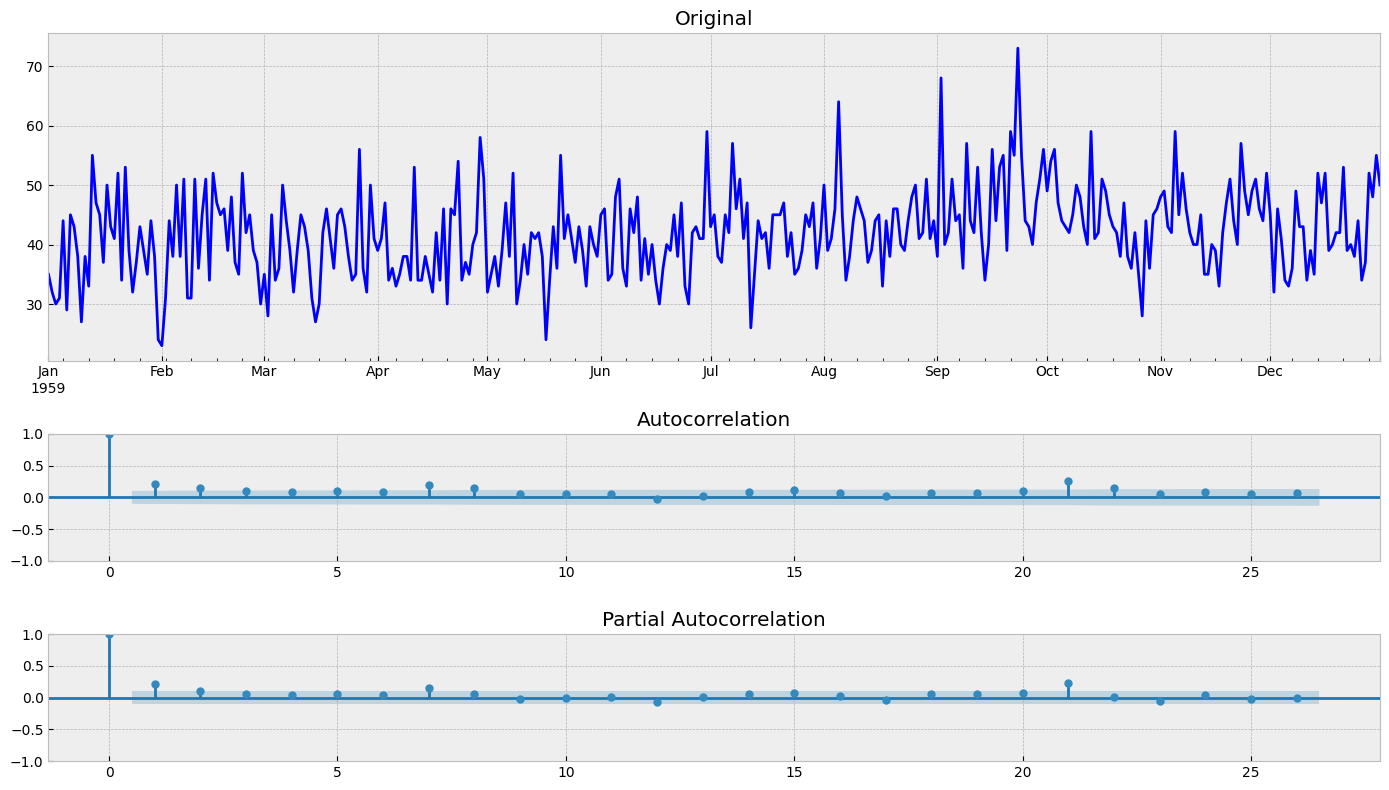

In [59]:
# Посмотрим данные по первому датасету daily-total-female-births-in-cal
tsplot(df[0].iloc[:,-1])

По тесту Дики Фуллера ряд стационарный.

## international-airline-passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


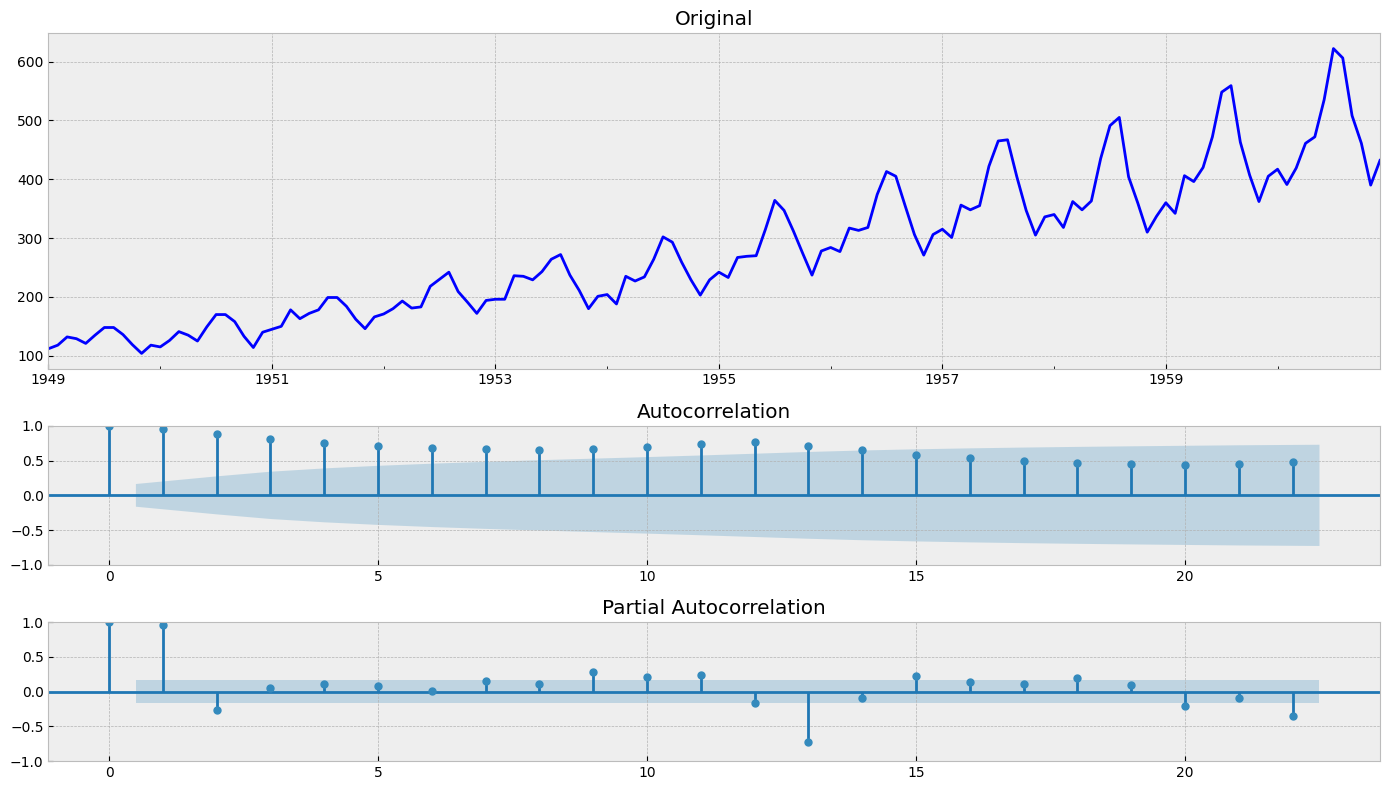

In [58]:
# Посмотрим данные по второму датасету international-airline-passengers
tsplot(df[1].iloc[:,-1])

На графике выше виден тренд и сезонность. Избавимся от тренда

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


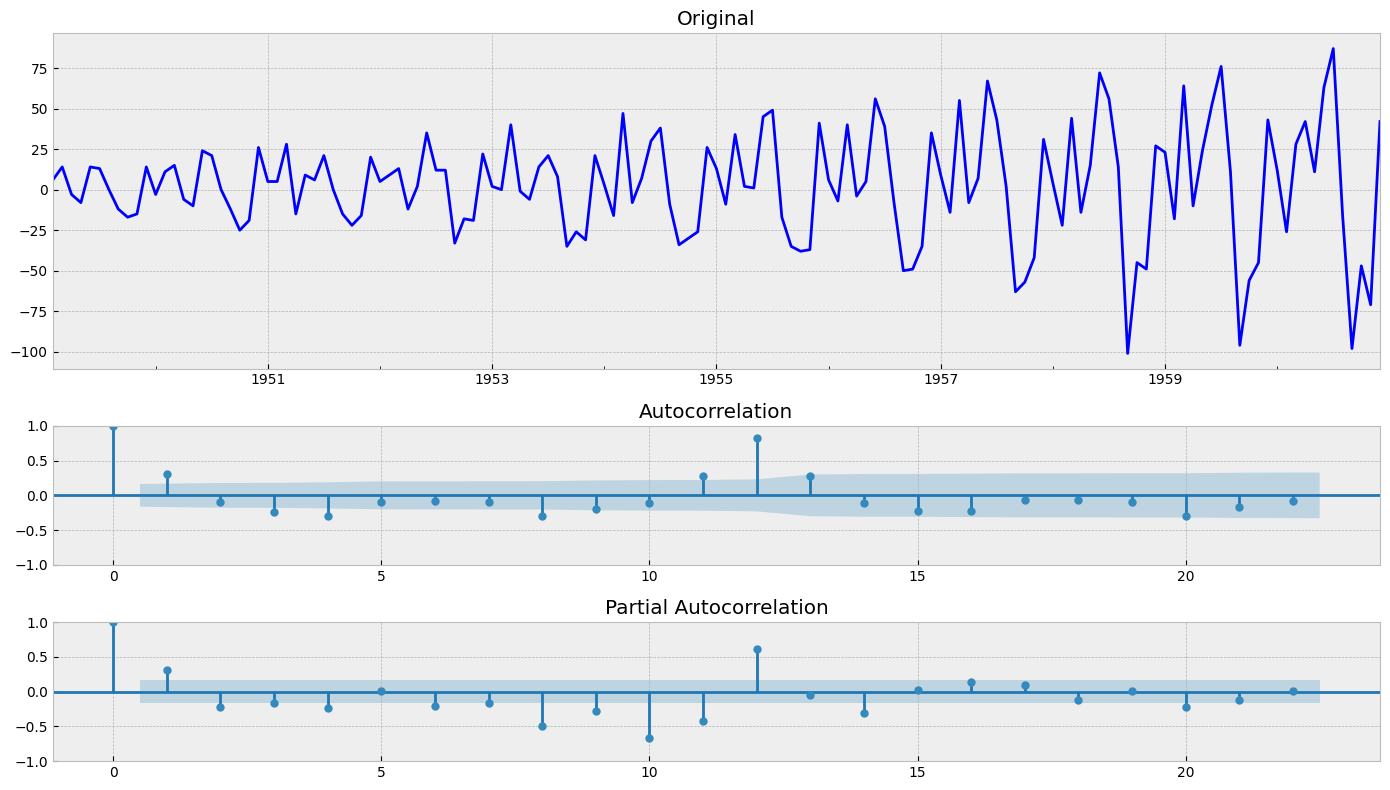

In [40]:
df_air_diff = df[1].diff(periods=1).dropna()

tsplot(df_air_diff.iloc[:,-1])

От тренда мы избавились, теперь избавимся от сезонности.
предположу, что сезонность здесь равна 12 месяцам

Results of Dickey-Fuller Test:
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


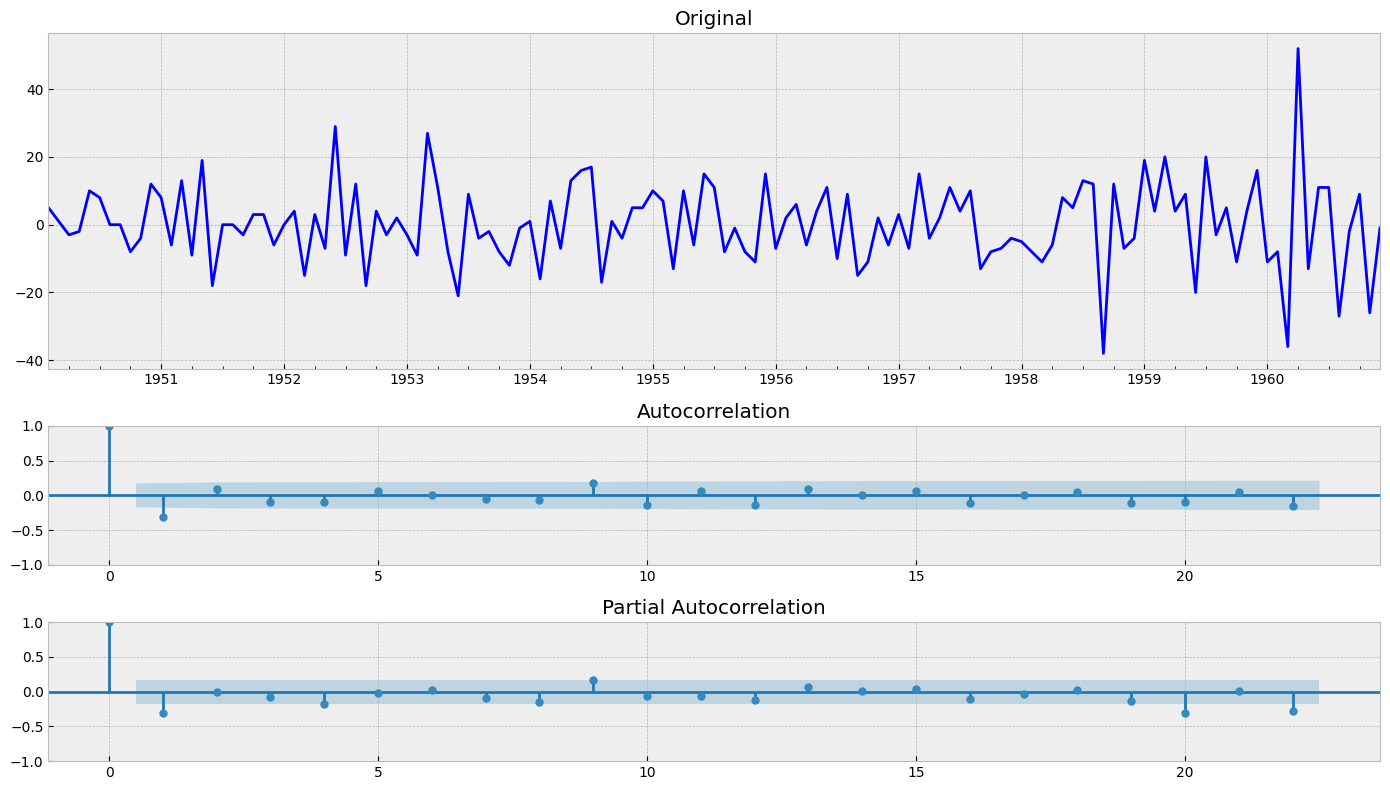

In [41]:
df_air_diff_seasonal = df_air_diff.diff(periods=12).dropna()
tsplot(df_air_diff_seasonal.iloc[:,-1])

Привели данные к стационарному виду

## mean-monthly-air-temperature-deg

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


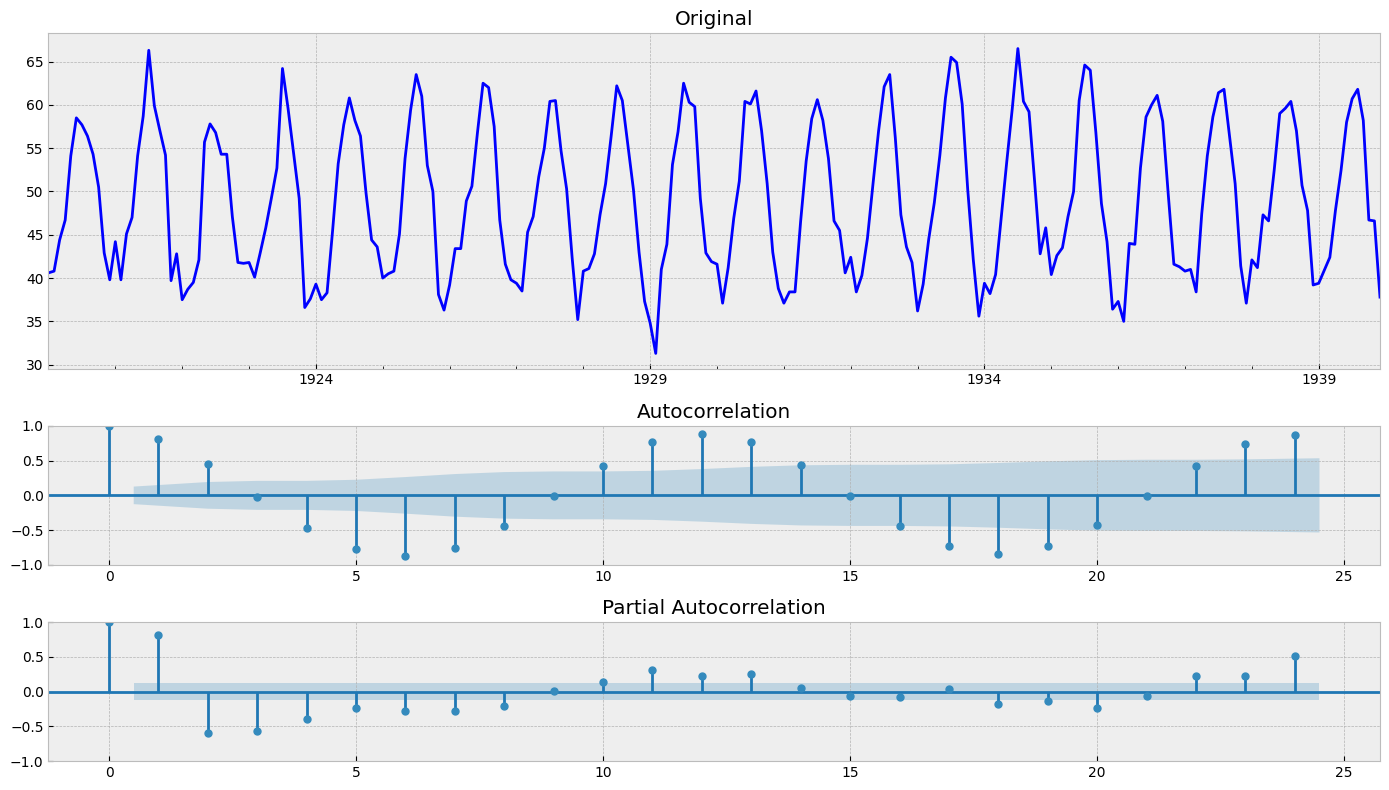

In [60]:
# Посмотрим данные по погоде
tsplot(df[2].iloc[:,-1])

Ряд стационарен

## monthly-boston-armed-robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


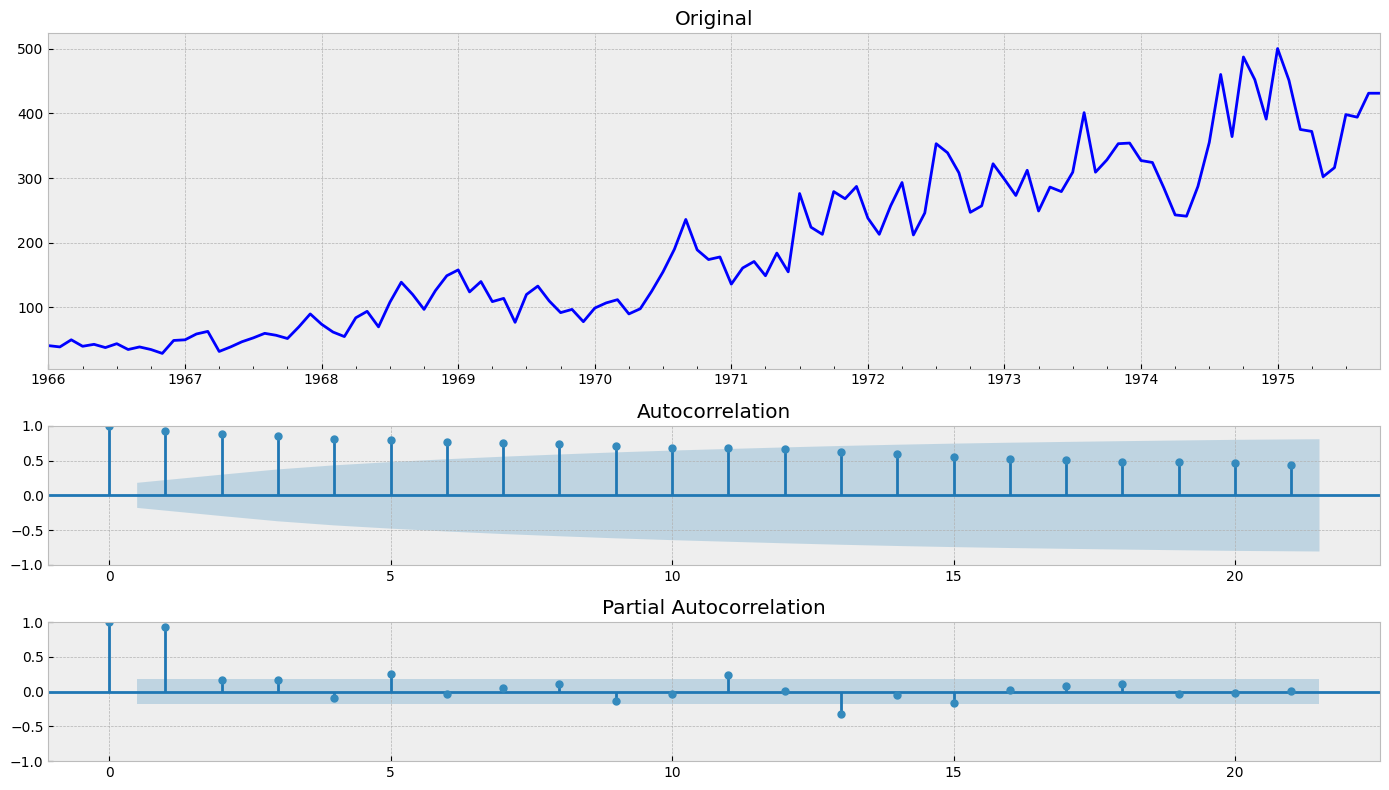

In [61]:
# Посмотрим данные по разбоям в бостоне
tsplot(df[3].iloc[:,-1])

На графике тут тоже виден тренд и, возможно, сезонность. Избавимся от тренда

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


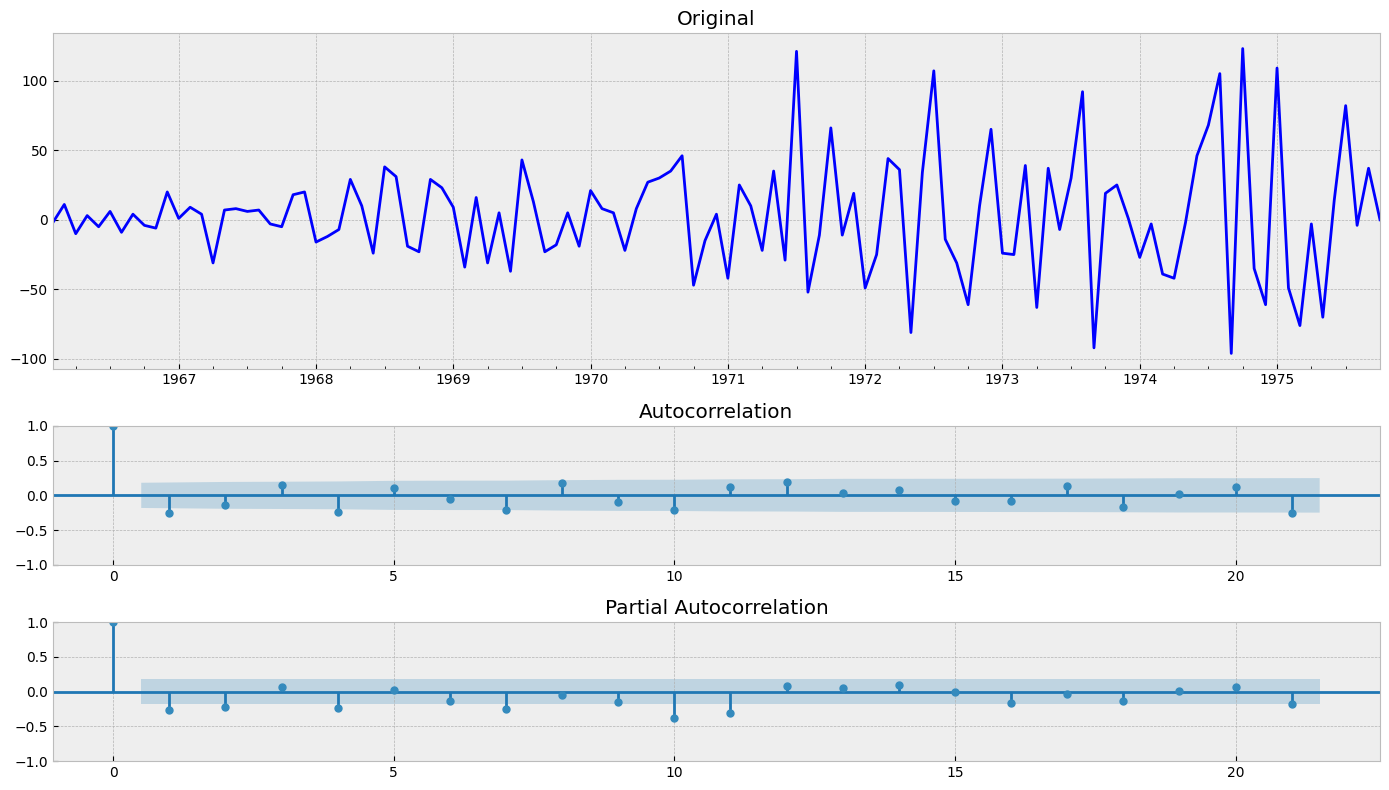

In [62]:
df_boston_diff = df[3].diff(periods=1).dropna()

tsplot(df_boston_diff.iloc[:,-1])

Избавились от нестационарности

## monthly-sales-of-company-x-jan-6

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


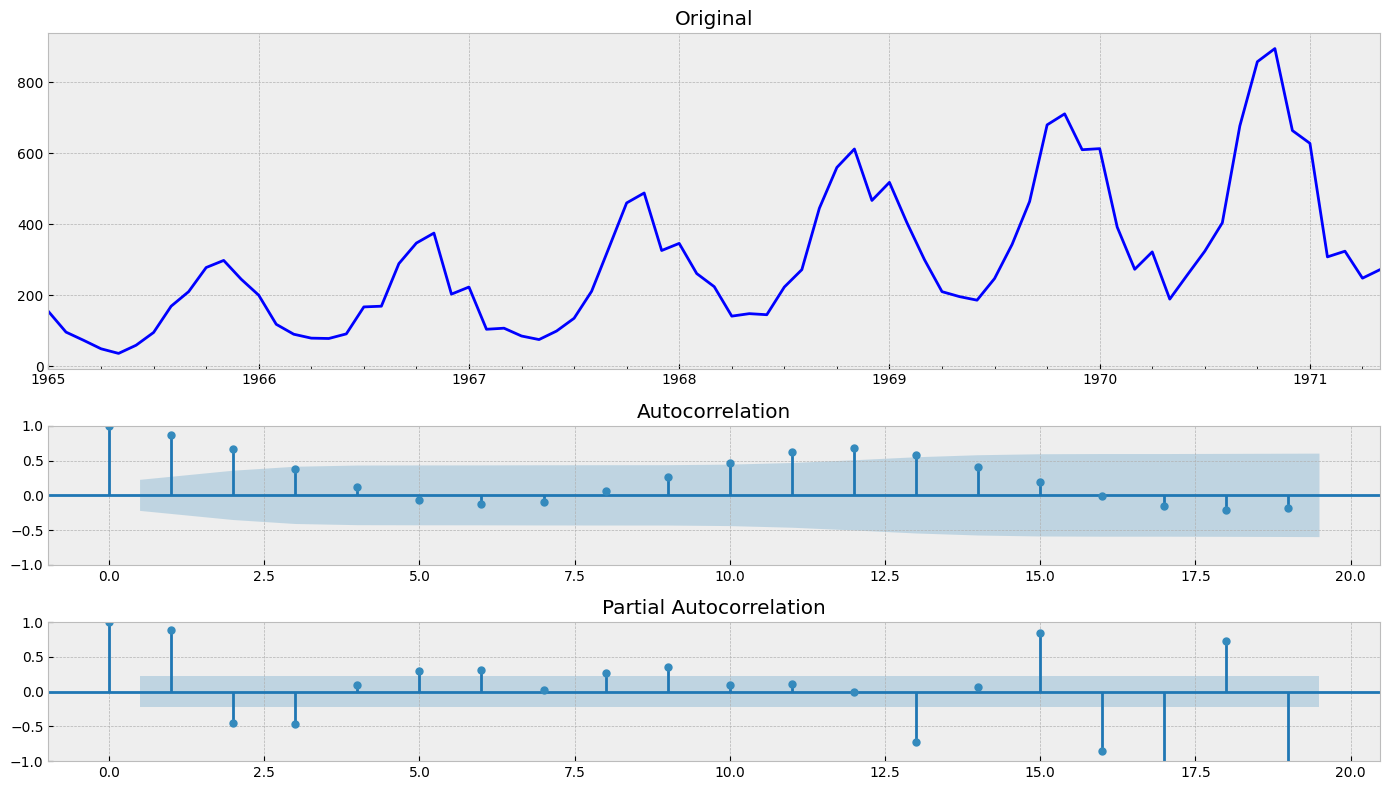

In [63]:
# Посмотрим данные по продажам компании
tsplot(df[4].iloc[:,-1])

На графике выше точно есть сезонность и тренд. избавимся от тренда

Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


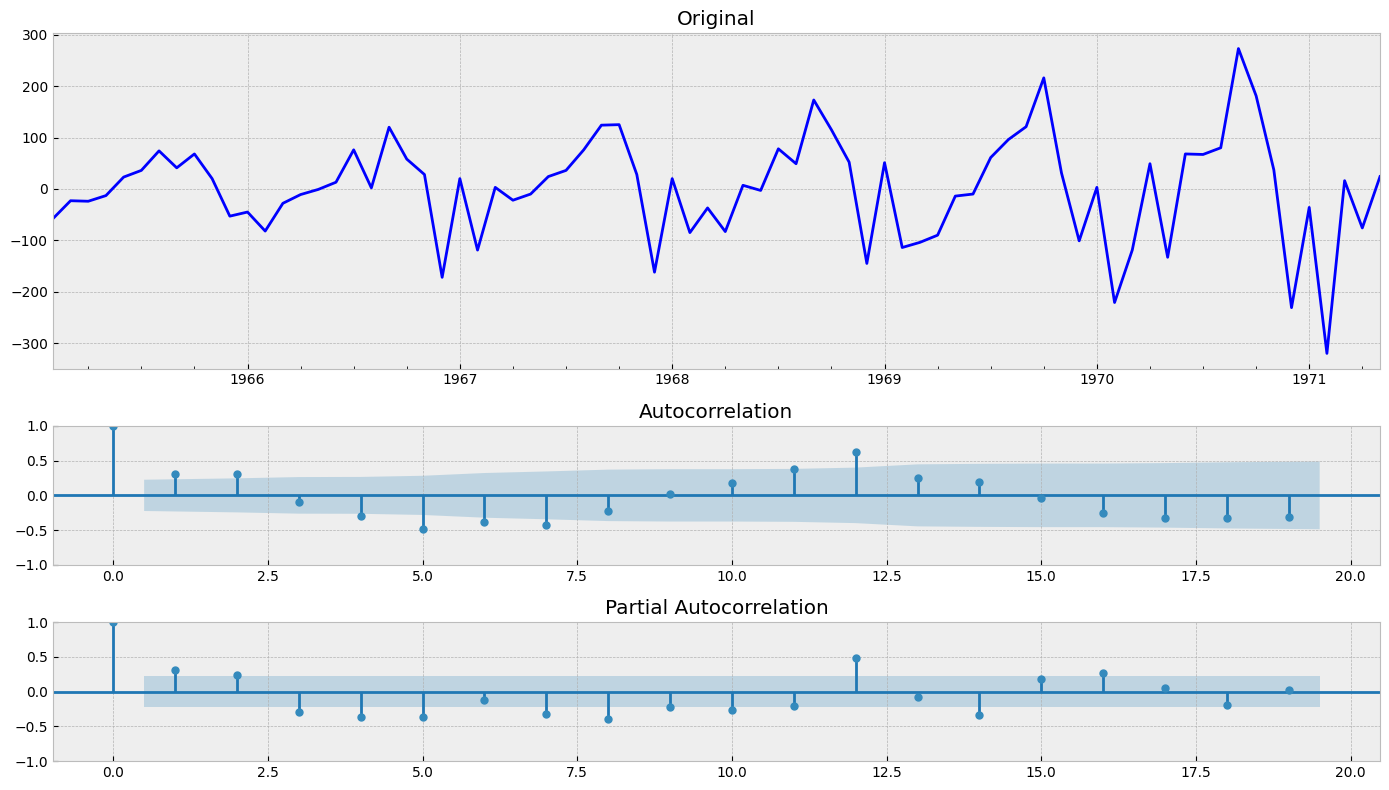

In [65]:
df_sales_diff = df[4].diff(periods=1).dropna()

tsplot(df_sales_diff.iloc[:,-1])

теперь избавимся и от сезонности

Results of Dickey-Fuller Test:
Test Statistic                 -2.633180
p-value                         0.086332
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


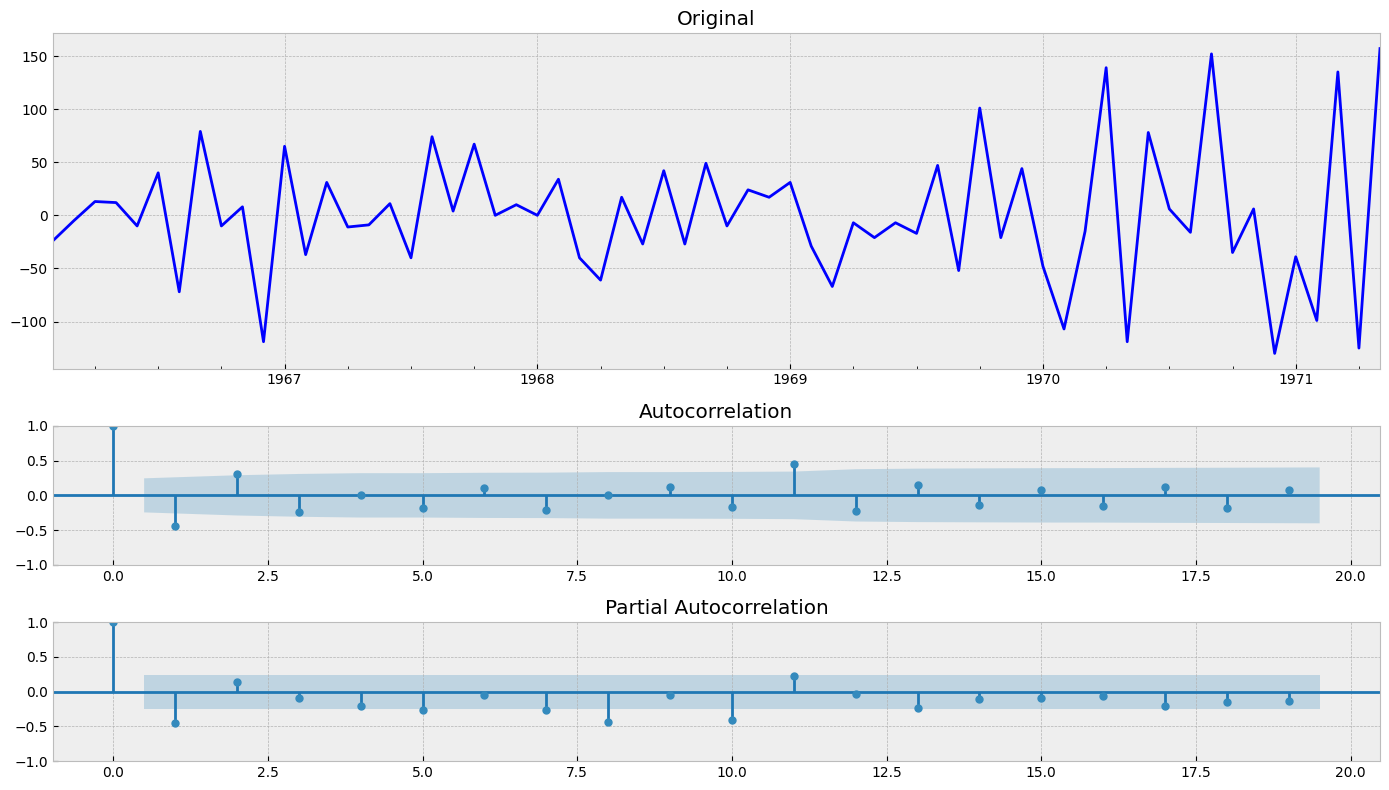

In [66]:
df_sales_diff_seasonal = df_sales_diff.diff(periods=12).dropna()
tsplot(df_sales_diff_seasonal.iloc[:,-1])

Попробуем еще раз дифференцировать ряд.

Results of Dickey-Fuller Test:
Test Statistic                -5.911303e+00
p-value                        2.634936e-07
#Lags Used                     1.000000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


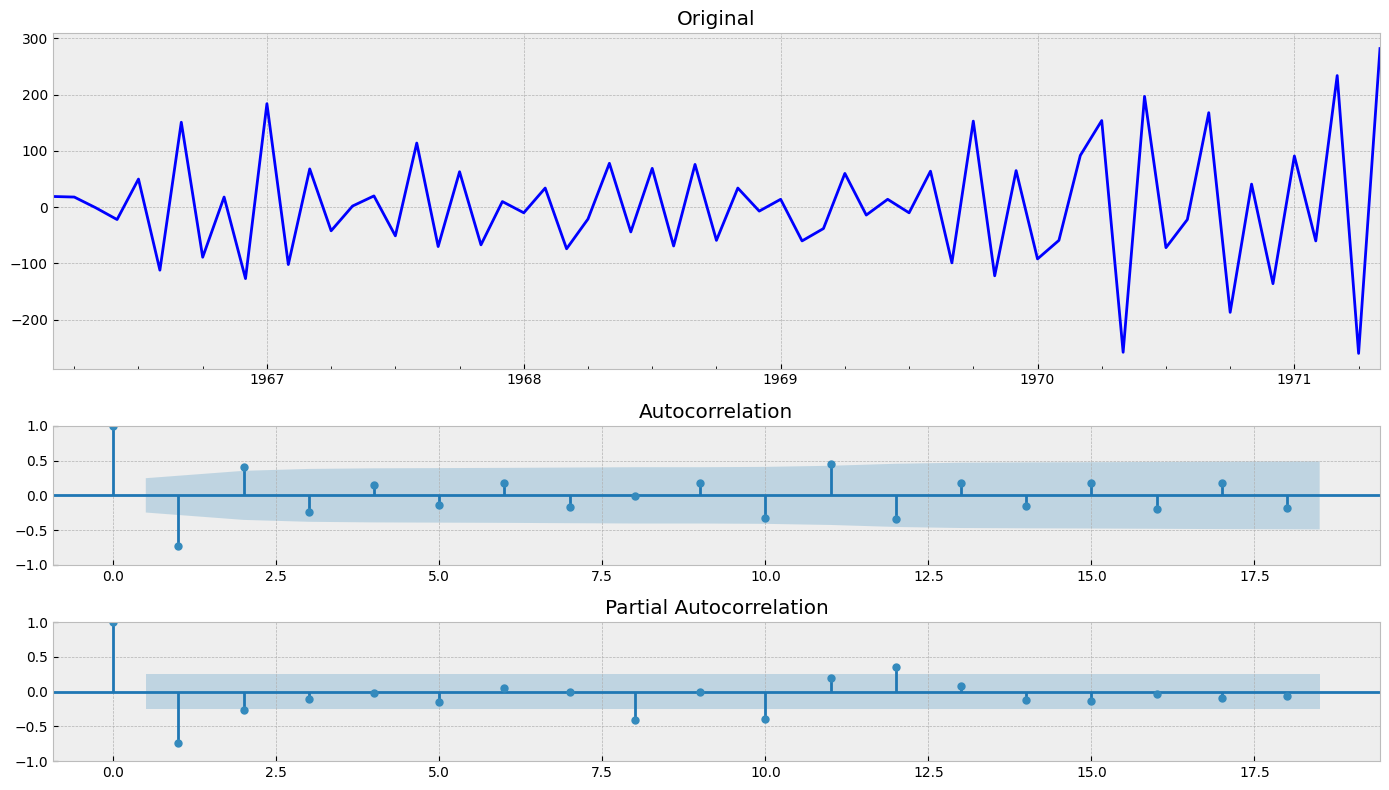

In [67]:
df_sales_diff_x2_seasonal =df_sales_diff_seasonal.diff(periods=1).dropna()
tsplot(df_sales_diff_x2_seasonal.iloc[:,-1])

привели ряд к стационарному виду

## weekly-closings-of-the-dowjones

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


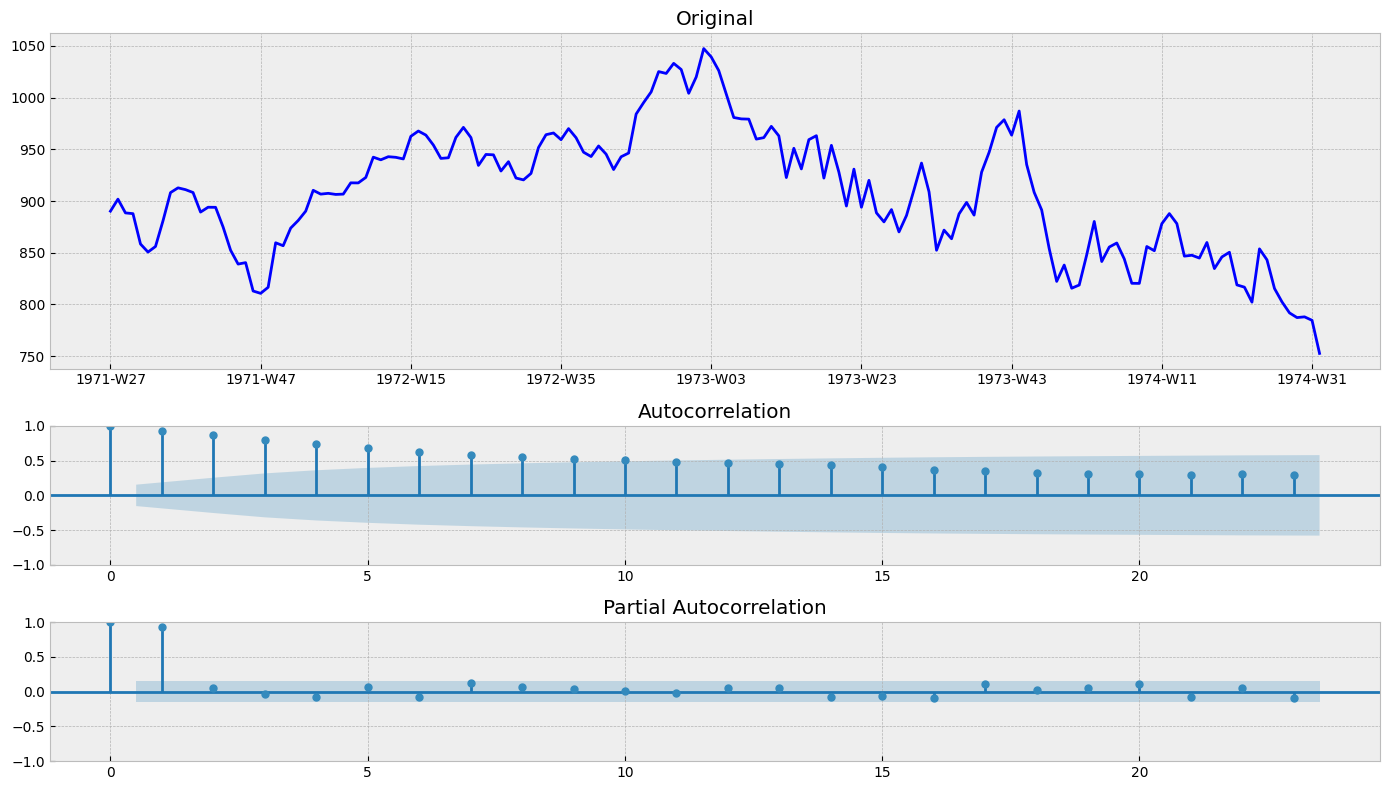

In [68]:
# Посмотрим данные по второму датасету international-airline-passengers
tsplot(df[5].iloc[:,-1])

чтобы добиться нестационарности избавимся от сезонности и дифференцируем 2 раза

Results of Dickey-Fuller Test:
Test Statistic                  -5.192414
p-value                          0.000009
#Lags Used                      14.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


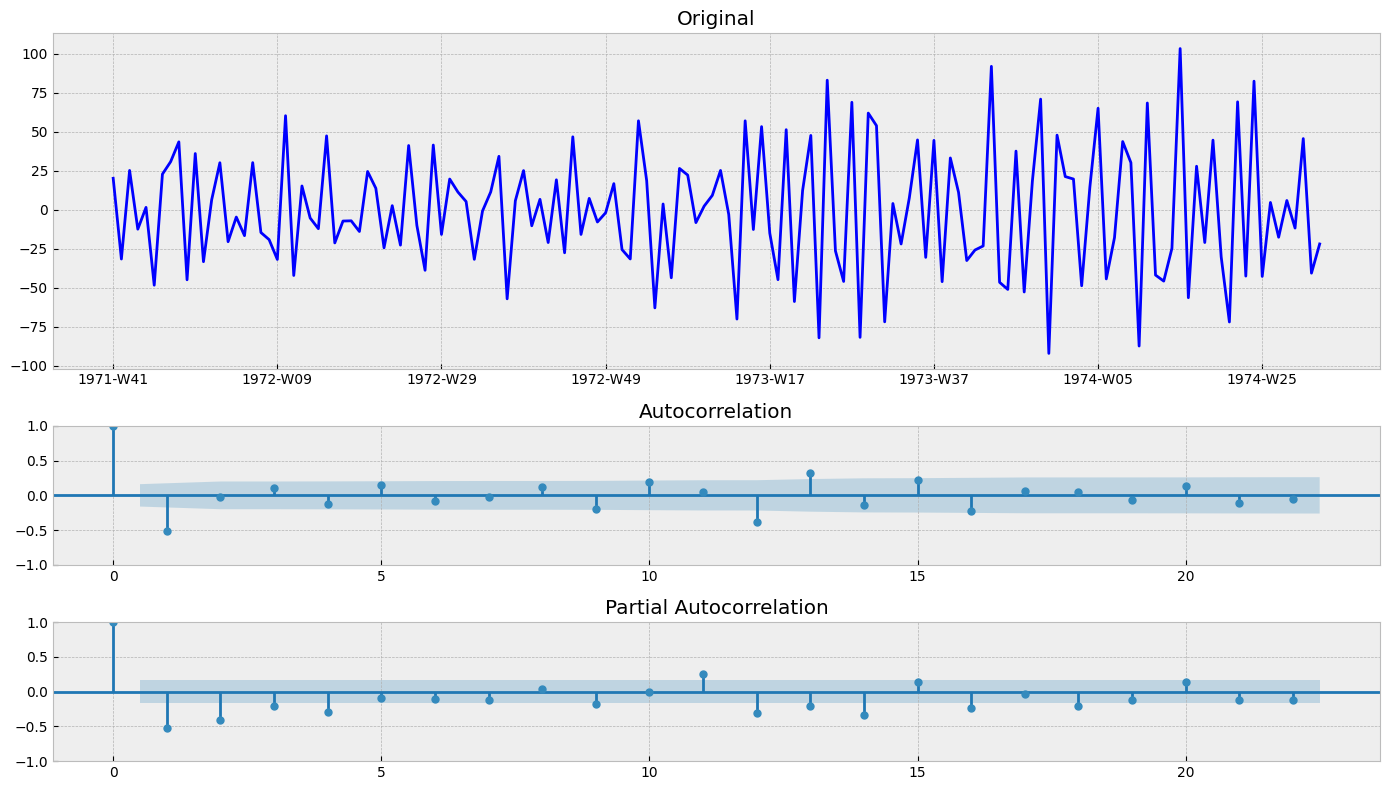

In [71]:
df_dow_diff =df[5].diff(periods=12).dropna().diff(periods=1).dropna().diff(periods=1).dropna()
tsplot(df_dow_diff.iloc[:,-1])